# Plot of sorted consensusTME NES values

Script related to figure 3h

### Aim:
- Plot sorted ConsensusTME NES derived from ssGSEA analysis on t-statistic values of differential expression analysis

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from statsmodels.robust import mad
from statsmodels.graphics.gofplots import qqplot

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load ConsensusTME NES after differential expression analysis

In [4]:
file_consensus_NES = home + 'Data/3/ConsensusTME_NES_after_DiffExp.txt'

consensus_NES = pd.read_csv(file_consensus_NES,
                            sep='\t',
                            index_col='Term')

consensus_NES.head()

,ConsensusTME_NES
Term,
B_cells,-1.671425
Cytotoxic_cells,-1.858738
Dendritic_cells,-2.114059
Endothelial,-1.740926
Eosinophils,-1.811567


In [5]:
consensus_NES.sort_values(by='ConsensusTME_NES')

,ConsensusTME_NES
Term,
T_regulatory_cells,-2.288004
Mast_cells,-2.220889
NK_cells,-2.210307
Macrophages_M2,-2.207834
Dendritic_cells,-2.114059
Plasma_cells,-2.044544
T_cells_CD4,-1.952217
Neutrophils,-1.935376
Cytotoxic_cells,-1.858738


## Evaluate normality distribution of NES data

### Visual normality checks

#### Density plot and histogram

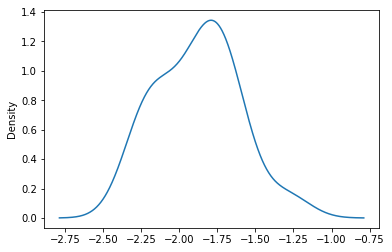

In [6]:
consensus_NES['ConsensusTME_NES'].plot(kind='KDE')

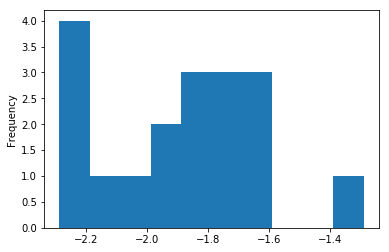

In [7]:
consensus_NES['ConsensusTME_NES'].plot(kind='hist',
                                       bins=10)

#### Q-Q plot

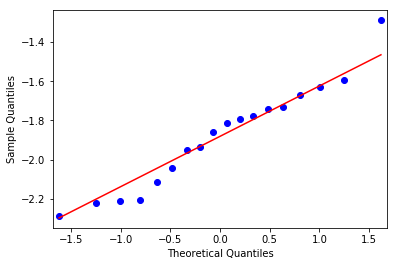

In [8]:
qqplot(consensus_NES['ConsensusTME_NES'].sort_values(), line='s')

plt.show()

### Statistical Normality Tests

#### Shapiro-Wilk test

In [9]:
stat, p = shapiro(consensus_NES['ConsensusTME_NES'])

alpha = 0.05
if p > alpha:
    print('p-value = '+str(p))
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('p-value = '+str(p))
    print('Sample does not look Gaussian (reject H0)')

p-value = 0.5665242075920105
Sample looks Gaussian (fail to reject H0)


#### D’Agostino’s K^2 test

In [10]:
stat, p = normaltest(consensus_NES['ConsensusTME_NES'])

alpha = 0.05
if p > alpha:
    print('p-value = '+str(p))
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('p-value = '+str(p))
    print('Sample does not look Gaussian (reject H0)')

p-value = 0.8728687740592678
Sample looks Gaussian (fail to reject H0)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


#### Anderson-Darling test

<p>
Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.
</p>
<p>
We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.
</p>

In [11]:
result = anderson(list(consensus_NES['ConsensusTME_NES']),
                  dist='norm')

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.292
15.000: 0.503, data looks normal (fail to reject H0)
10.000: 0.573, data looks normal (fail to reject H0)
5.000: 0.687, data looks normal (fail to reject H0)
2.500: 0.802, data looks normal (fail to reject H0)
1.000: 0.954, data looks normal (fail to reject H0)


## Generate normal distribution for visual comparison

In [12]:
Exp_NES_sorted = list(consensus_NES['ConsensusTME_NES'].sort_values())

fit = stats.norm.pdf(Exp_NES_sorted,
                     np.mean(Exp_NES_sorted),
                     np.std(Exp_NES_sorted))

In [13]:
MIN = min(consensus_NES['ConsensusTME_NES'])

MIN

-2.2880040582548

In [14]:
MAX = max(consensus_NES['ConsensusTME_NES'])

MAX

-1.2880040582548

In [15]:
num_ticks = round(round(round(MAX+0.1, 1) - round(MIN-0.1, 1), 1) / 0.1)

num_ticks

12

In [16]:
ticks_linear = [round(i, 1) for i in np.linspace(round(MIN-0.1, 1),round(MAX+0.1, 1), num_ticks)]

ticks_linear

[-2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


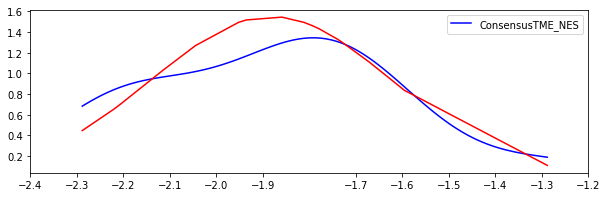

In [17]:
fig = plt.figure(figsize=(10,3))

ax = sns.kdeplot(consensus_NES['ConsensusTME_NES'],
                 cut=0,
                 c='b')
    
pl.plot(Exp_NES_sorted,fit,'-',c='r')


ax.set_xticks(ticks_linear)

plt.show()

In [18]:
fig = ax.get_figure()

FILE = "../../Figures/main/3/panels/3h_consensusTME_NES_t_statistic_dist"

fig.savefig(FILE, bbox='tight')

## Plot sorted NES

### Define and find outliers using z-score and modified z-score

In [19]:
def outliers_modified_z_score(ys, threshold=float):

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    
    return np.where(np.abs(modified_z_scores) > threshold)

def outliers_z_score(ys, threshold=float):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [20]:
outliers = outliers_modified_z_score(consensus_NES['ConsensusTME_NES'], 1.96)

consensus_NES.iloc[outliers]

,ConsensusTME_NES
Term,
Monocytes,-1.288004


In [21]:
consensus_NES['Term'] = consensus_NES.index

In [22]:
consensus_NES.sort_values(by='ConsensusTME_NES',
                          ascending=False,
                          inplace=True)

consensus_NES.head()

,ConsensusTME_NES,Term
Term,,
Monocytes,-1.288004,Monocytes
T_cells_CD8,-1.595527,T_cells_CD8
Fibroblasts,-1.626924,Fibroblasts
B_cells,-1.671425,B_cells
Macrophages,-1.730700,Macrophages


In [23]:
med = consensus_NES['ConsensusTME_NES'].median()
MAD = mad(consensus_NES['ConsensusTME_NES'])

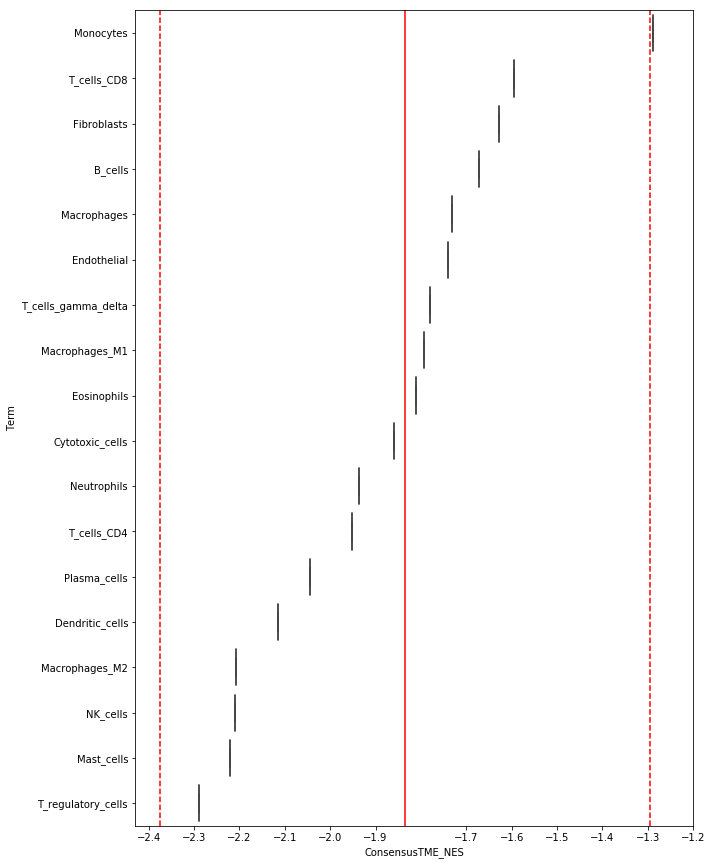

In [24]:
fig = plt.figure(figsize=(10,15))

ax = sns.boxplot(x='ConsensusTME_NES',
                 y='Term',
                 data=consensus_NES)

plt.axvline(x=med,alpha=1,c='r')
plt.axvline(x=med+(1.96*MAD),alpha=1,c='r',ls='--')
plt.axvline(x=med-(1.96*MAD),alpha=1,c='r',ls='--')

ax.set_xticks(ticks_linear)

plt.show()

In [25]:
fig = ax.get_figure()

FILE = "../../Figures/main/3/3g_consensusTME_NES_t_statistic_medians.pdf"

fig.savefig(FILE, bbox='tight')

# End script